In [3]:
import nilearn 
import nistats 

import matplotlib.pyplot as plt
import os

from nilearn import plotting

import IPython.display as dp

from jupyterthemes import jtplot

import glob
import numpy as np

/home/raghav/.local/lib/python2.7/site-packages/nilearn/__init__.py:73: DeprecationWarning: Python2 support is deprecated and will be removed in the next release. Consider switching to Python 3.6 or 3.7.
  _python_deprecation_warnings()
/home/raghav/.local/lib/python2.7/site-packages/nistats/__init__.py:65: DeprecationWarning: Python2 support is deprecated and will be removed in a future release. Consider switching to Python3.
  _python_deprecation_warnings()


In [2]:
# set directory path 
path = ('/data/loki_1/data/BOLD/sub-790/')
fmriprep_path = ('/data/loki_1/data/BOLD/fmriprep/')
agg_data_path = ('/data/loki_1/analysis/aggregated_data/')
fig_path = ('/data/loki_1/analysis/figures/')

In [3]:
sessions = np.arange(2,11)

In [4]:
bold_ref_fn = ('/data/loki_1/data/BOLD/fmriprep/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-01_space-MNI152NLin2009cAsym_boldref.nii.gz')

In [5]:
print(bold_ref_fn)

/data/loki_1/data/BOLD/fmriprep/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-01_space-MNI152NLin2009cAsym_boldref.nii.gz


In [4]:
plotting.plot_anat(bold_ref_fn, display_mode='x') # saggital view 
plotting.plot_anat(bold_ref_fn, display_mode='y') # coronal view 
plotting.plot_anat(bold_ref_fn, display_mode='z') # axial view 

plotting.plot_anat(bold_ref_fn, display_mode='ortho')

NameError: name 'bold_ref_fn' is not defined

# sample workflow for subcortical parcellation 

In [7]:
from nilearn import datasets

dataset = datasets.fetch_atlas_pauli_2017() # get probabilistic subcortical atlas 
atlas_filename = dataset.maps # filename for the atlas
labels = dataset.labels # region labels

n_nodes = len(labels)

In [ ]:
plotting.plot_prob_atlasbatlas_filenamelasb_atlasb_bg_img=las(atlas_filename, title='', 
                         bg_img=bold_ref_fn, display_mode='z', draw_cross=False, 
                        colorbar=True) # only include striatal regions 

In [8]:
labels 

['Pu',
 'Ca',
 'NAC',
 'EXA',
 'GPe',
 'GPi',
 'SNc',
 'RN',
 'SNr',
 'PBP',
 'VTA',
 'VeP',
 'HN',
 'HTH',
 'MN',
 'STH']

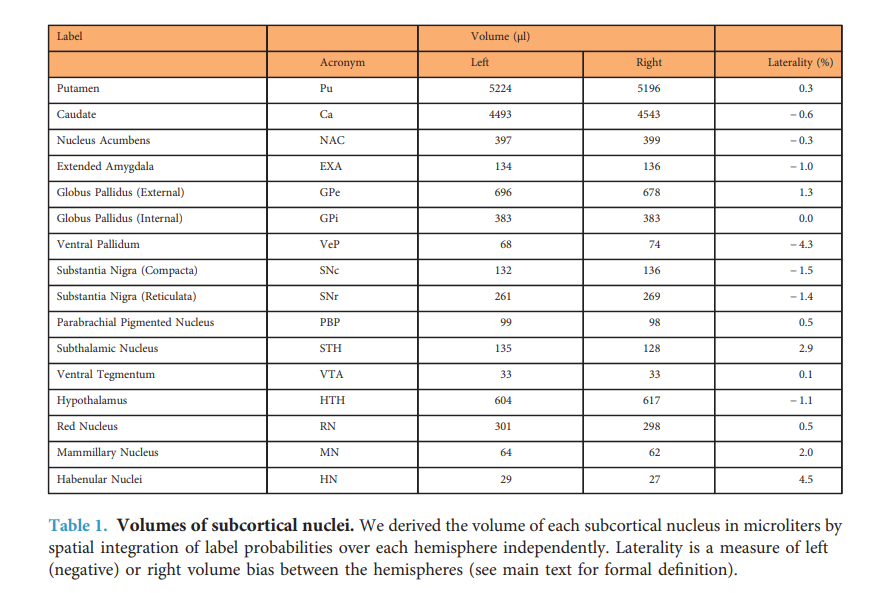

In [9]:
dp.display(dp.Image('/data/loki_1/nb_imgs/subcort_labels.png'))

In [10]:
# mask the BOLD data 
from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True, memory='nilearn_cache', verbose=5)

# Time series of striatal nodes

In [11]:
tr = .750
max_tr = 552.75

n_samples = len(np.arange(0, max_tr+tr, tr))

In [19]:
sessions

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [37]:
time_series_dfs = []

for session in sessions: 
    
    session_epi_fns = np.sort(glob.glob(os.path.join(fmriprep_path, 'sub-790/ses-*' + str(session) + '/func/sub-790_ses-*'+ str(session) + '_task-lokicat_run-*_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')))
    
    for epi_fn in session_epi_fns: 
        time_series_temp = masker.fit_transform(epi_fn, ) # get time series matrix 
        
        
        # time series of BOLD data should be n_samples by n_nodes np.array
        if time_series_temp.shape != (n_samples, n_nodes):
            print('check dimensions of time series for ' + str(epi_fn)) 
        
        time_series_temp_df = pd.DataFrame(data=time_series_temp, columns=labels)
        time_series_temp_df['session'] = session
        time_series_temp_df['run'] = int(epi_fn[84:86])
        time_series_temp_df['subject'] = int(epi_fn[56:59])
        time_series_temp_df['sample_n'] = np.arange(0, len(time_series_temp))
        time_series_temp_df['tr'] = np.arange(0, len(time_series_temp))

        time_series_dfs.append(time_series_temp_df)

[NiftiMapsMasker.fit_transform] loading regions from /home/krista/nilearn_data/pauli_2017/pauli_2017_prob.nii.gz
[Memory]14407.2s, 240.1min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/krista/nilearn_data/pauli_2017/pauli_2017_prob.nii.gz
[Memory]14422.3s, 240.4min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/krista/nilearn_data/pauli_2017/pauli_2017_prob.nii.gz
[Memory]14437.5s, 240.6min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/krista/nilearn_data/pauli_2017/pauli_2017_prob.nii.gz
[Memory]14452.6s, 240.9min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s,

[Memory]14887.5s, 248.1min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/krista/nilearn_data/pauli_2017/pauli_2017_prob.nii.gz
[Memory]14902.6s, 248.4min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/krista/nilearn_data/pauli_2017/pauli_2017_prob.nii.gz
[Memory]14917.3s, 248.6min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/krista/nilearn_data/pauli_2017/pauli_2017_prob.nii.gz
[Memory]14932.4s, 248.9min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiMapsMasker.fit_transform] loading regions from /home/krista/nilearn_data/pauli_2017/pauli_2017_prob

In [22]:
# issue with this run (fewer samples than expected; n_samples = 619 instead of 738)
time_series_test = masker.fit_transform('/data/loki_1/data/BOLD/fmriprep/sub-790/ses-05/func/sub-790_ses-05_task-lokicat_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
print(len(time_series_test))

[NiftiMapsMasker.fit_transform] loading regions from /home/krista/nilearn_data/pauli_2017/pauli_2017_prob.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/data/loki_1/data/BOLD/fmriprep/sub-790/ses-05/func/sub-790_ses-05_task-lokicat_run-05_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'maps_img': '/home/krista/nilearn_data/pauli_2017/pauli_2017_prob.nii.gz',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from /data/loki_1/data/BOLD/fmriprep/sub-790/ses-05/func/sub-790_ses-05_task-lokicat_run-05_space-MNI152NLi

In [39]:
time_series_df = pd.concat(time_series_dfs, axis=0) # concat ts df 

In [40]:
time_series_df.head()

,Pu,Ca,NAC,EXA,GPe,GPi,SNc,RN,SNr,PBP,...,VeP,HN,HTH,MN,STH,session,run,subject,sample_n,tr
0,2.266255,2.971930,1.002421,1.490307,1.343273,1.131594,-0.452085,0.329685,0.183814,1.449112,...,-1.258244,0.360391,2.495322,0.553173,2.308679,2,1,790,0,0
1,0.799290,2.104931,0.879724,1.139650,0.879435,0.686737,-0.508559,-0.992244,0.559214,-0.572571,...,-0.906256,0.012001,1.457432,-0.325560,0.940108,2,1,790,1,1
2,1.289792,1.715006,0.186896,1.246972,0.603433,0.069852,1.222349,-0.792562,0.467353,0.128016,...,-1.834205,2.223681,2.551722,-0.546790,1.846897,2,1,790,2,2
3,2.398250,2.170931,-0.426802,0.228989,2.282301,2.846234,1.216442,0.130083,0.714572,-0.114369,...,-0.017621,1.478325,2.058441,-1.324307,0.914414,2,1,790,3,3
4,2.110759,2.329646,0.049206,1.938075,1.373984,1.373505,0.586446,-2.318520,-0.155403,-0.002751,...,-1.662180,-0.311706,1.285784,-0.313103,1.057500,2,1,790,4,4


In [41]:
time_series_df.to_csv(os.path.join(agg_data_path, 'subcort_ts_df.csv'), index=False)

In [85]:
striatum_df = time_series_df[['Pu', 'Ca', 'NAC', 'sample_n', 'tr', 'session', 'run']]  

In [86]:
for session in sessions: 
    striatum_df.loc[striatum_df.session == session, 'session_sample'] = range(len(striatum_df.loc[striatum_df.session == session]))

/home/krista/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/krista/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
striatum_sample_df = striatum_df.iloc[0:300]

In [87]:
# averaging striatal node activation 
striatum_df['pooled_striatum'] = np.average(striatum_df[['Pu', 'Ca', 'NAC']], axis=1)

/home/krista/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
striatum_df.head()

,Pu,Ca,NAC,sample_n,tr,session,run,session_sample,pooled_striatum
0,2.266255,2.971930,1.002421,0,0,2,1,0.0,2.080202
1,0.799290,2.104931,0.879724,1,1,2,1,1.0,1.261315
2,1.289792,1.715006,0.186896,2,2,2,1,2.0,1.063898
3,2.398250,2.170931,-0.426802,3,3,2,1,3.0,1.380793
4,2.110759,2.329646,0.049206,4,4,2,1,4.0,1.496537


In [89]:
striatum_df.to_csv(os.path.join(agg_data_path, 'striatal_nodes_ts_df.csv'), index=False)

Text(0.5, 1.0, 'Nucleus Accumbens')

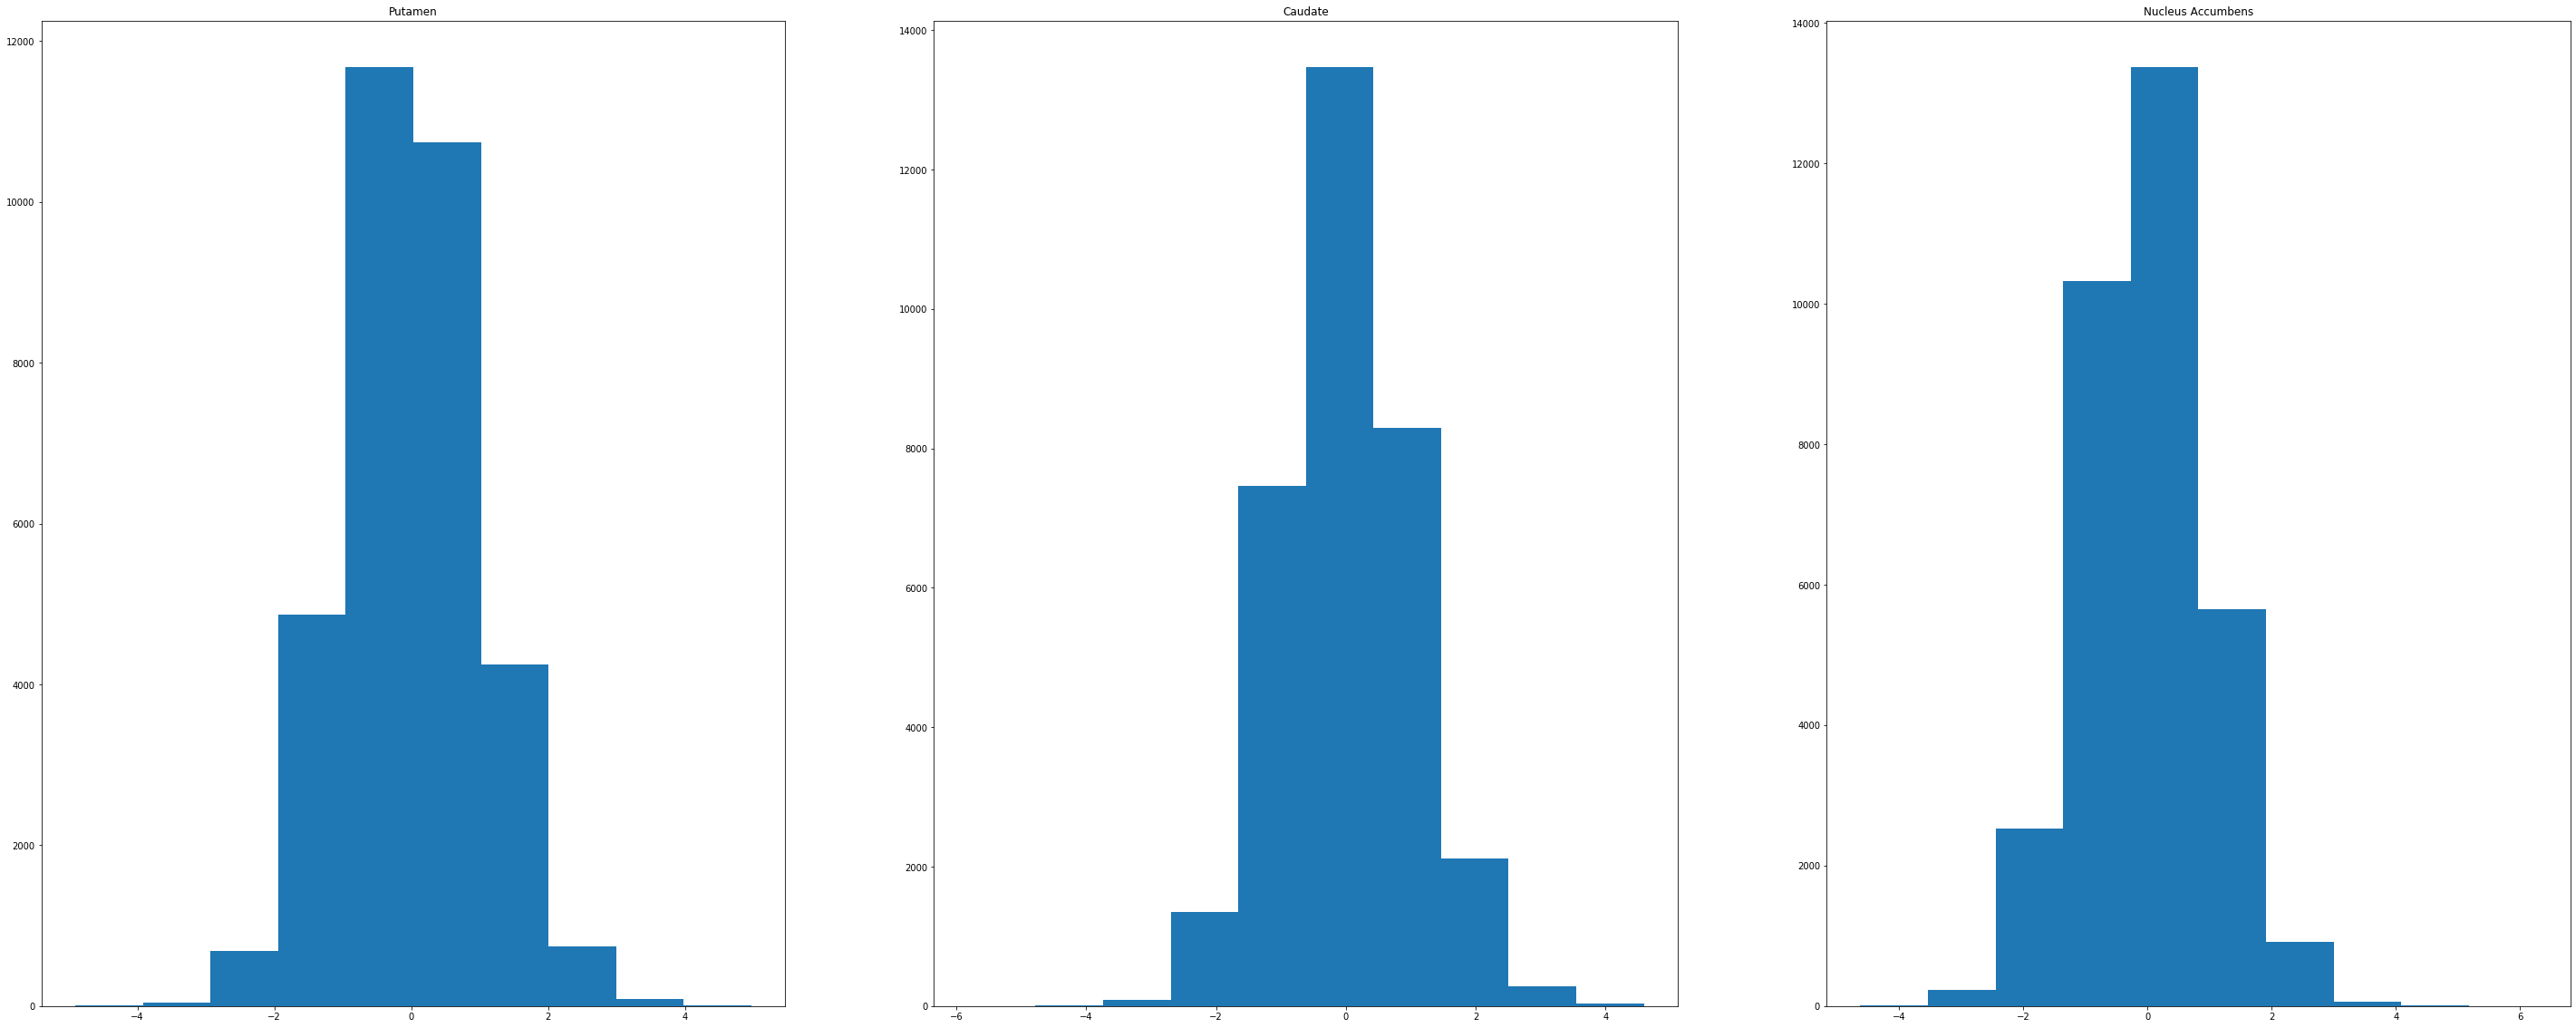

In [49]:
jtplot.style('grade3',figsize=(50, 20), fscale=5)

fig, ax = plt.subplots(1,3,figsize=(50,20))
ax[0].hist(striatum_df.Pu)
ax[1].hist(striatum_df.Ca)
ax[2].hist(striatum_df.NAC)

ax[0].set_title('Putamen')
ax[1].set_title('Caudate')
ax[2].set_title('Nucleus Accumbens')

Text(0.5, 1.0, 'Nucleus Accumbens')

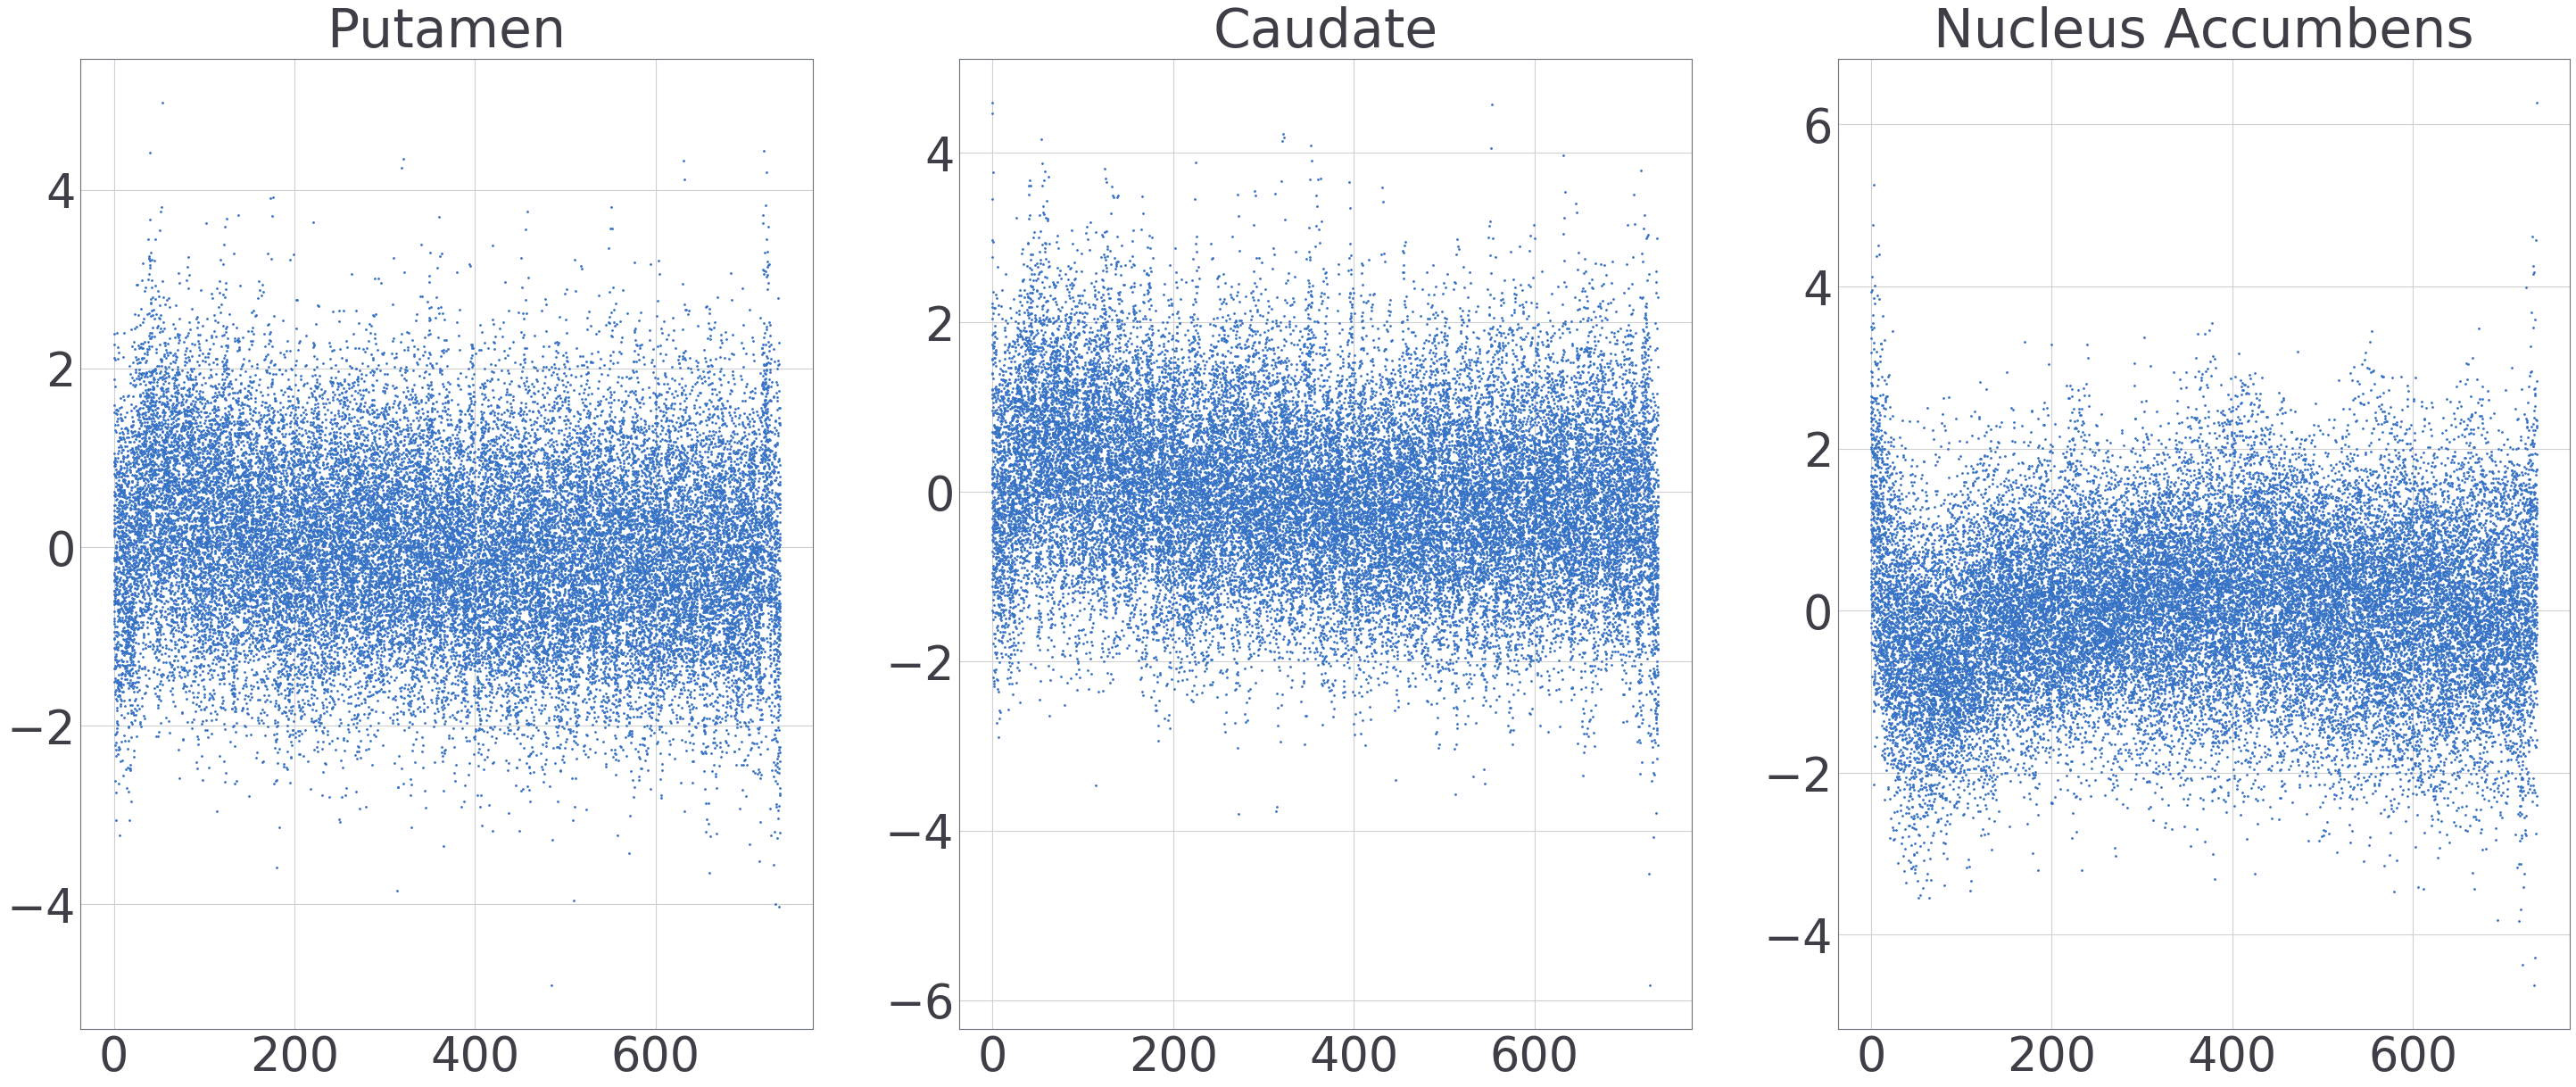

In [52]:
jtplot.style('grade3',figsize=(20, 10), fscale=5)
sns.set_color_codes("muted")

fig, ax = plt.subplots(1,3,figsize=(50,20))
ax[0].plot(striatum_df.sample_n, striatum_df.Pu, '.')
ax[1].plot(striatum_df.sample_n, striatum_df.Ca, '.')
ax[2].plot(striatum_df.sample_n, striatum_df.NAC, '.')

ax[0].set_title('Putamen')
ax[1].set_title('Caudate')
ax[2].set_title('Nucleus Accumbens')

# plt.savefig(os.path.join(fig_path, 'striatal_node_ts.png'))

Text(0.5, 0, 'sample')

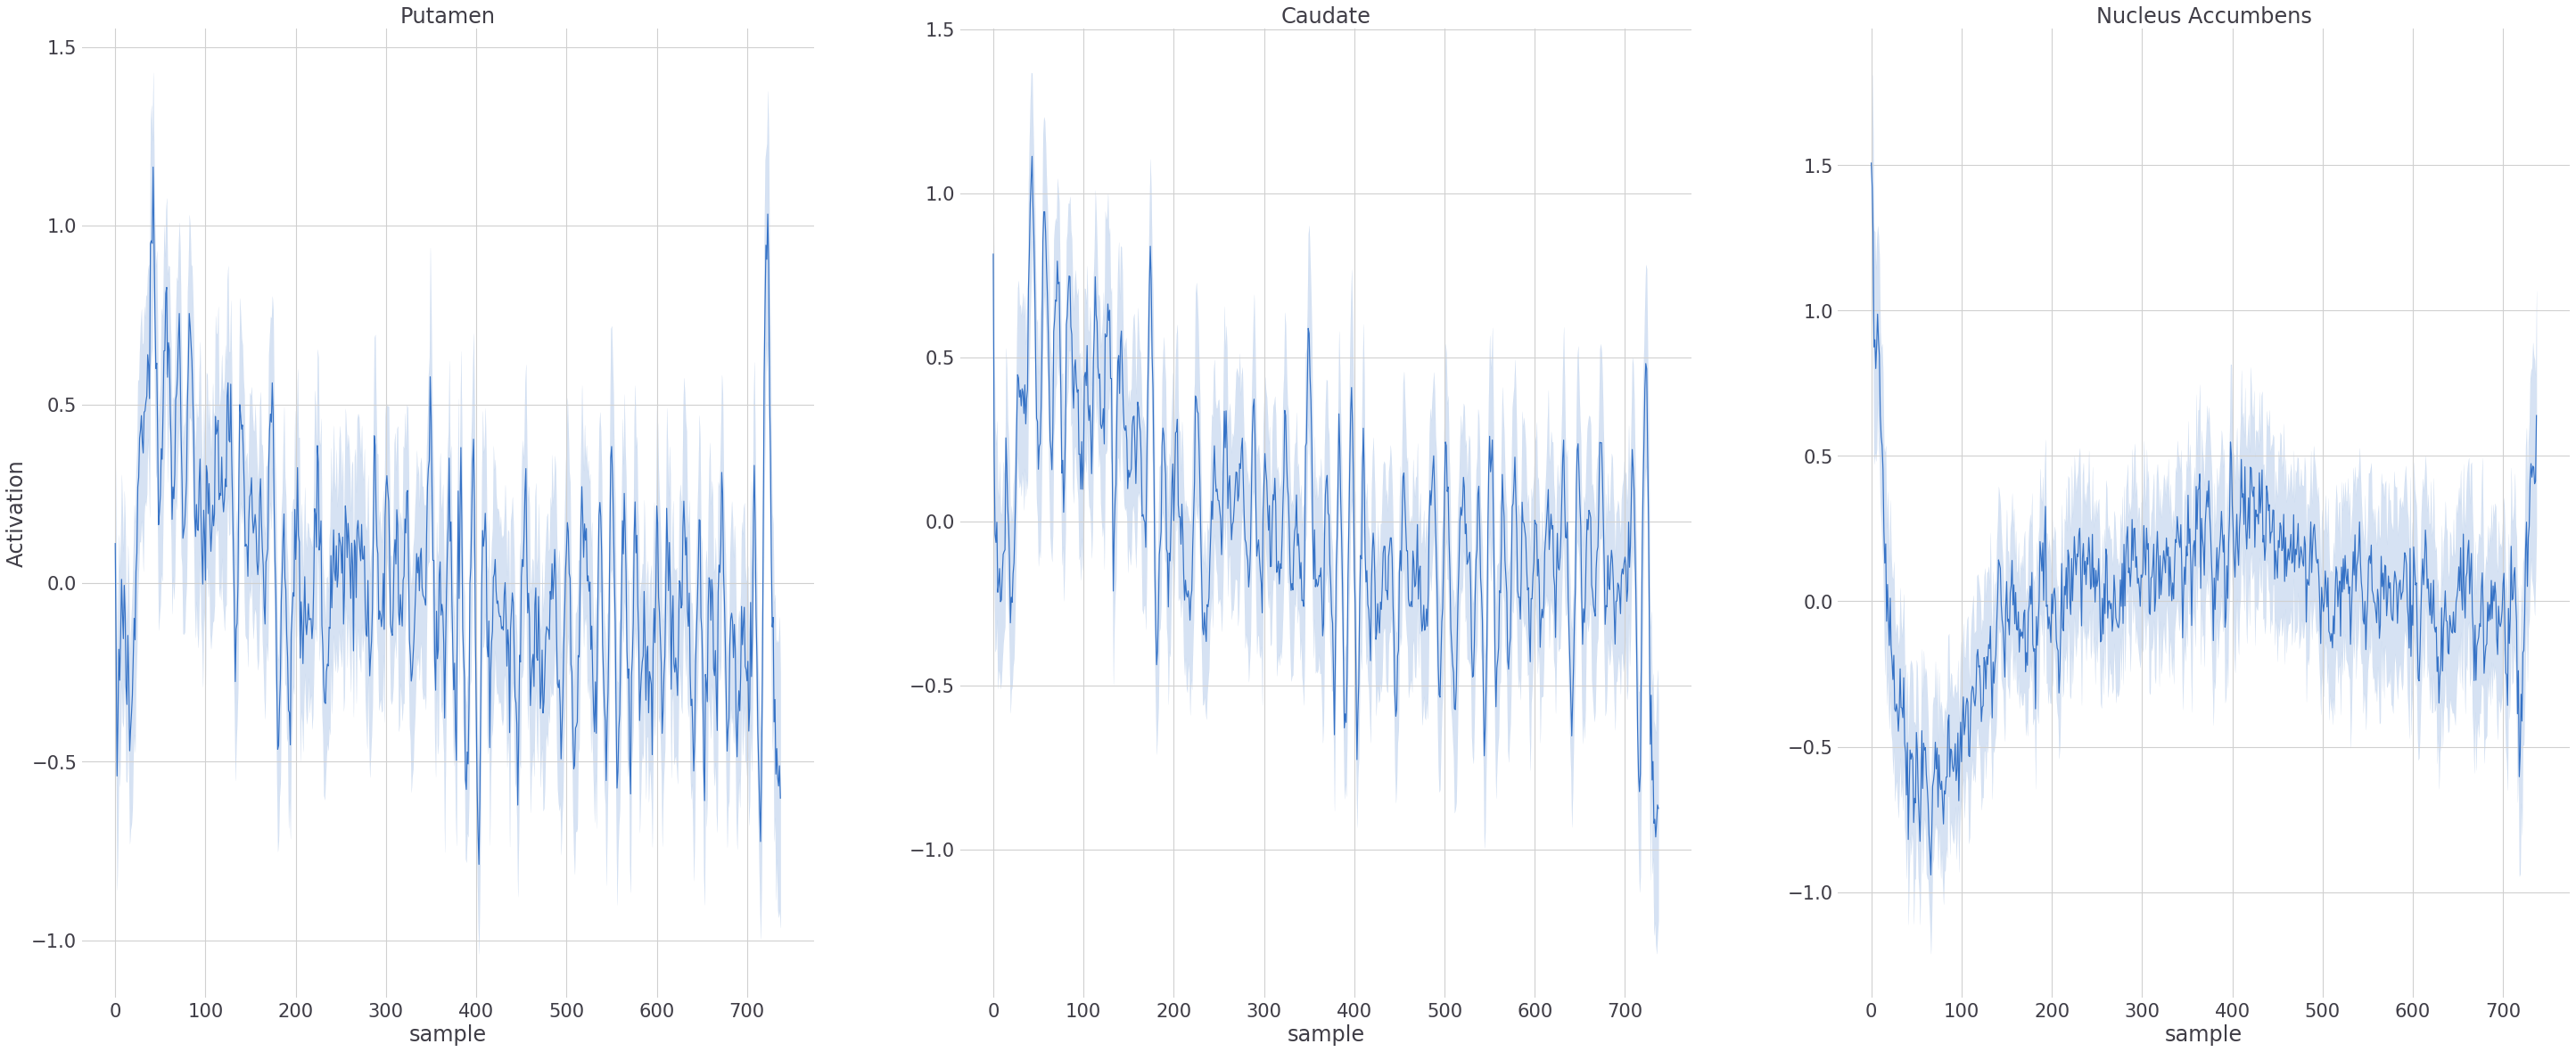

In [61]:
# with confidence intervals 

import seaborn as sns 
jtplot.style('grade3',figsize=(50, 20), fscale=2, spines=False)

fig, ax = plt.subplots(1,3,figsize=(50,20))

sns.lineplot(y="Pu", x= "sample_n", data=striatum_df, ax=ax[0])
sns.lineplot(y="Ca", x= "sample_n", data=striatum_df, ax=ax[1])
sns.lineplot(y="NAC", x= "sample_n", data=striatum_df, ax=ax[2])

ax[0].set_title('Putamen')
ax[1].set_title('Caudate')
ax[2].set_title('Nucleus Accumbens')


ax[0].set_ylabel('Activation')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

ax[0].set_xlabel('sample')
ax[1].set_xlabel('sample')
ax[2].set_xlabel('sample')

# Pooled striatal node activity

(array([4.0000e+00, 3.2000e+01, 3.5500e+02, 2.8740e+03, 9.5110e+03,
        1.2069e+04, 6.3250e+03, 1.6390e+03, 2.5200e+02, 3.0000e+01]),
 array([-3.3369033 , -2.7093942 , -2.0818849 , -1.4543757 , -0.82686657,
        -0.19935739,  0.4281518 ,  1.055661  ,  1.6831702 ,  2.3106794 ,
         2.9381886 ], dtype=float32),
 <a list of 10 Patch objects>)

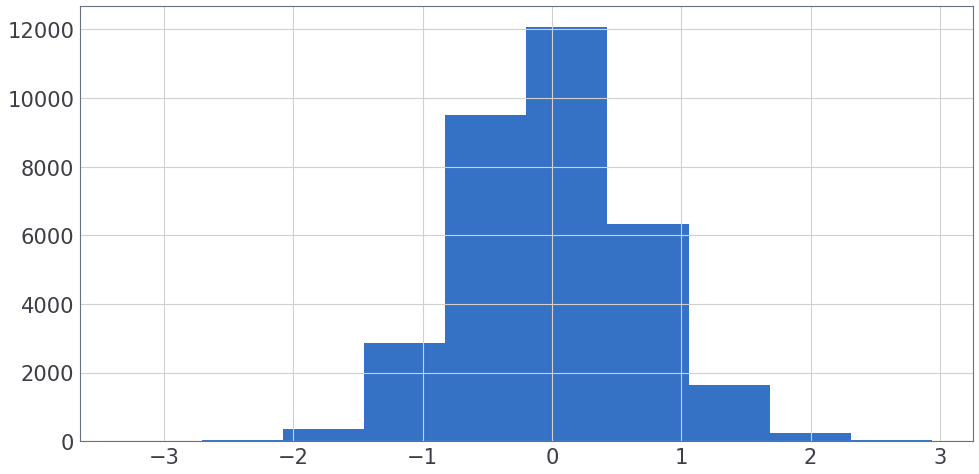

In [57]:
jtplot.style('grade3',figsize=(20, 10), fscale=2)
plt.hist(striatum_df.pooled_striatum)

In [ ]:
plt.plot(striatum_df.sample_n, striatum_df.pooled_striatum)
plt.xlabel('sample')
plt.ylabel('averaged Ca / Pu / NAcc activity')
plt.title('Pooled striatal activity')
# plt.savefig(os.path.join(fig_path, 'pooled_striatal_ts.png'))

In [90]:
striatum_df.head()

,Pu,Ca,NAC,sample_n,tr,session,run,session_sample,pooled_striatum
0,2.266255,2.971930,1.002421,0,0,2,1,0.0,2.080202
1,0.799290,2.104931,0.879724,1,1,2,1,1.0,1.261315
2,1.289792,1.715006,0.186896,2,2,2,1,2.0,1.063898
3,2.398250,2.170931,-0.426802,3,3,2,1,3.0,1.380793
4,2.110759,2.329646,0.049206,4,4,2,1,4.0,1.496537


# Divided by session 

In [107]:
subsample_idx = striatum_df.session_sample.max() // 4

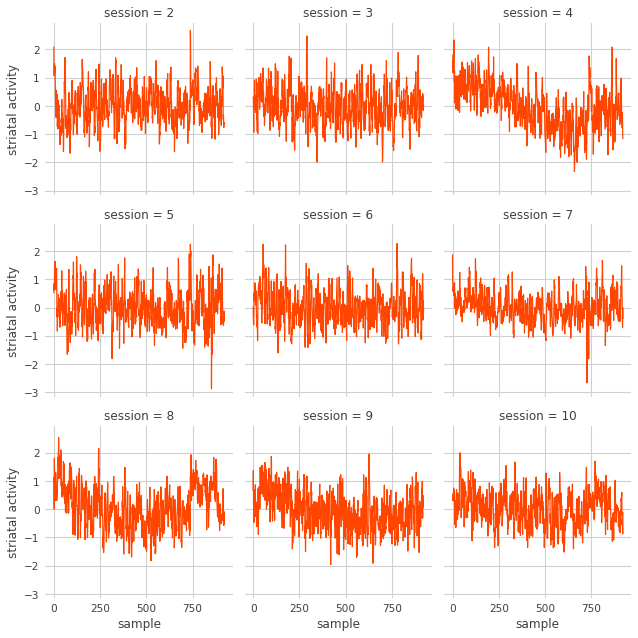

In [108]:
jtplot.style('grade3',figsize=(50, 20), fscale=1, spines=False)
sns.set_color_codes("muted")

g = sns.FacetGrid(striatum_df.loc[striatum_df.session_sample < subsample_idx], col='session', col_wrap=3)
g = g.map(sns.lineplot, "session_sample", "pooled_striatum", color='orangered')

g.set_axis_labels("sample", "striatal activity")

/home/krista/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


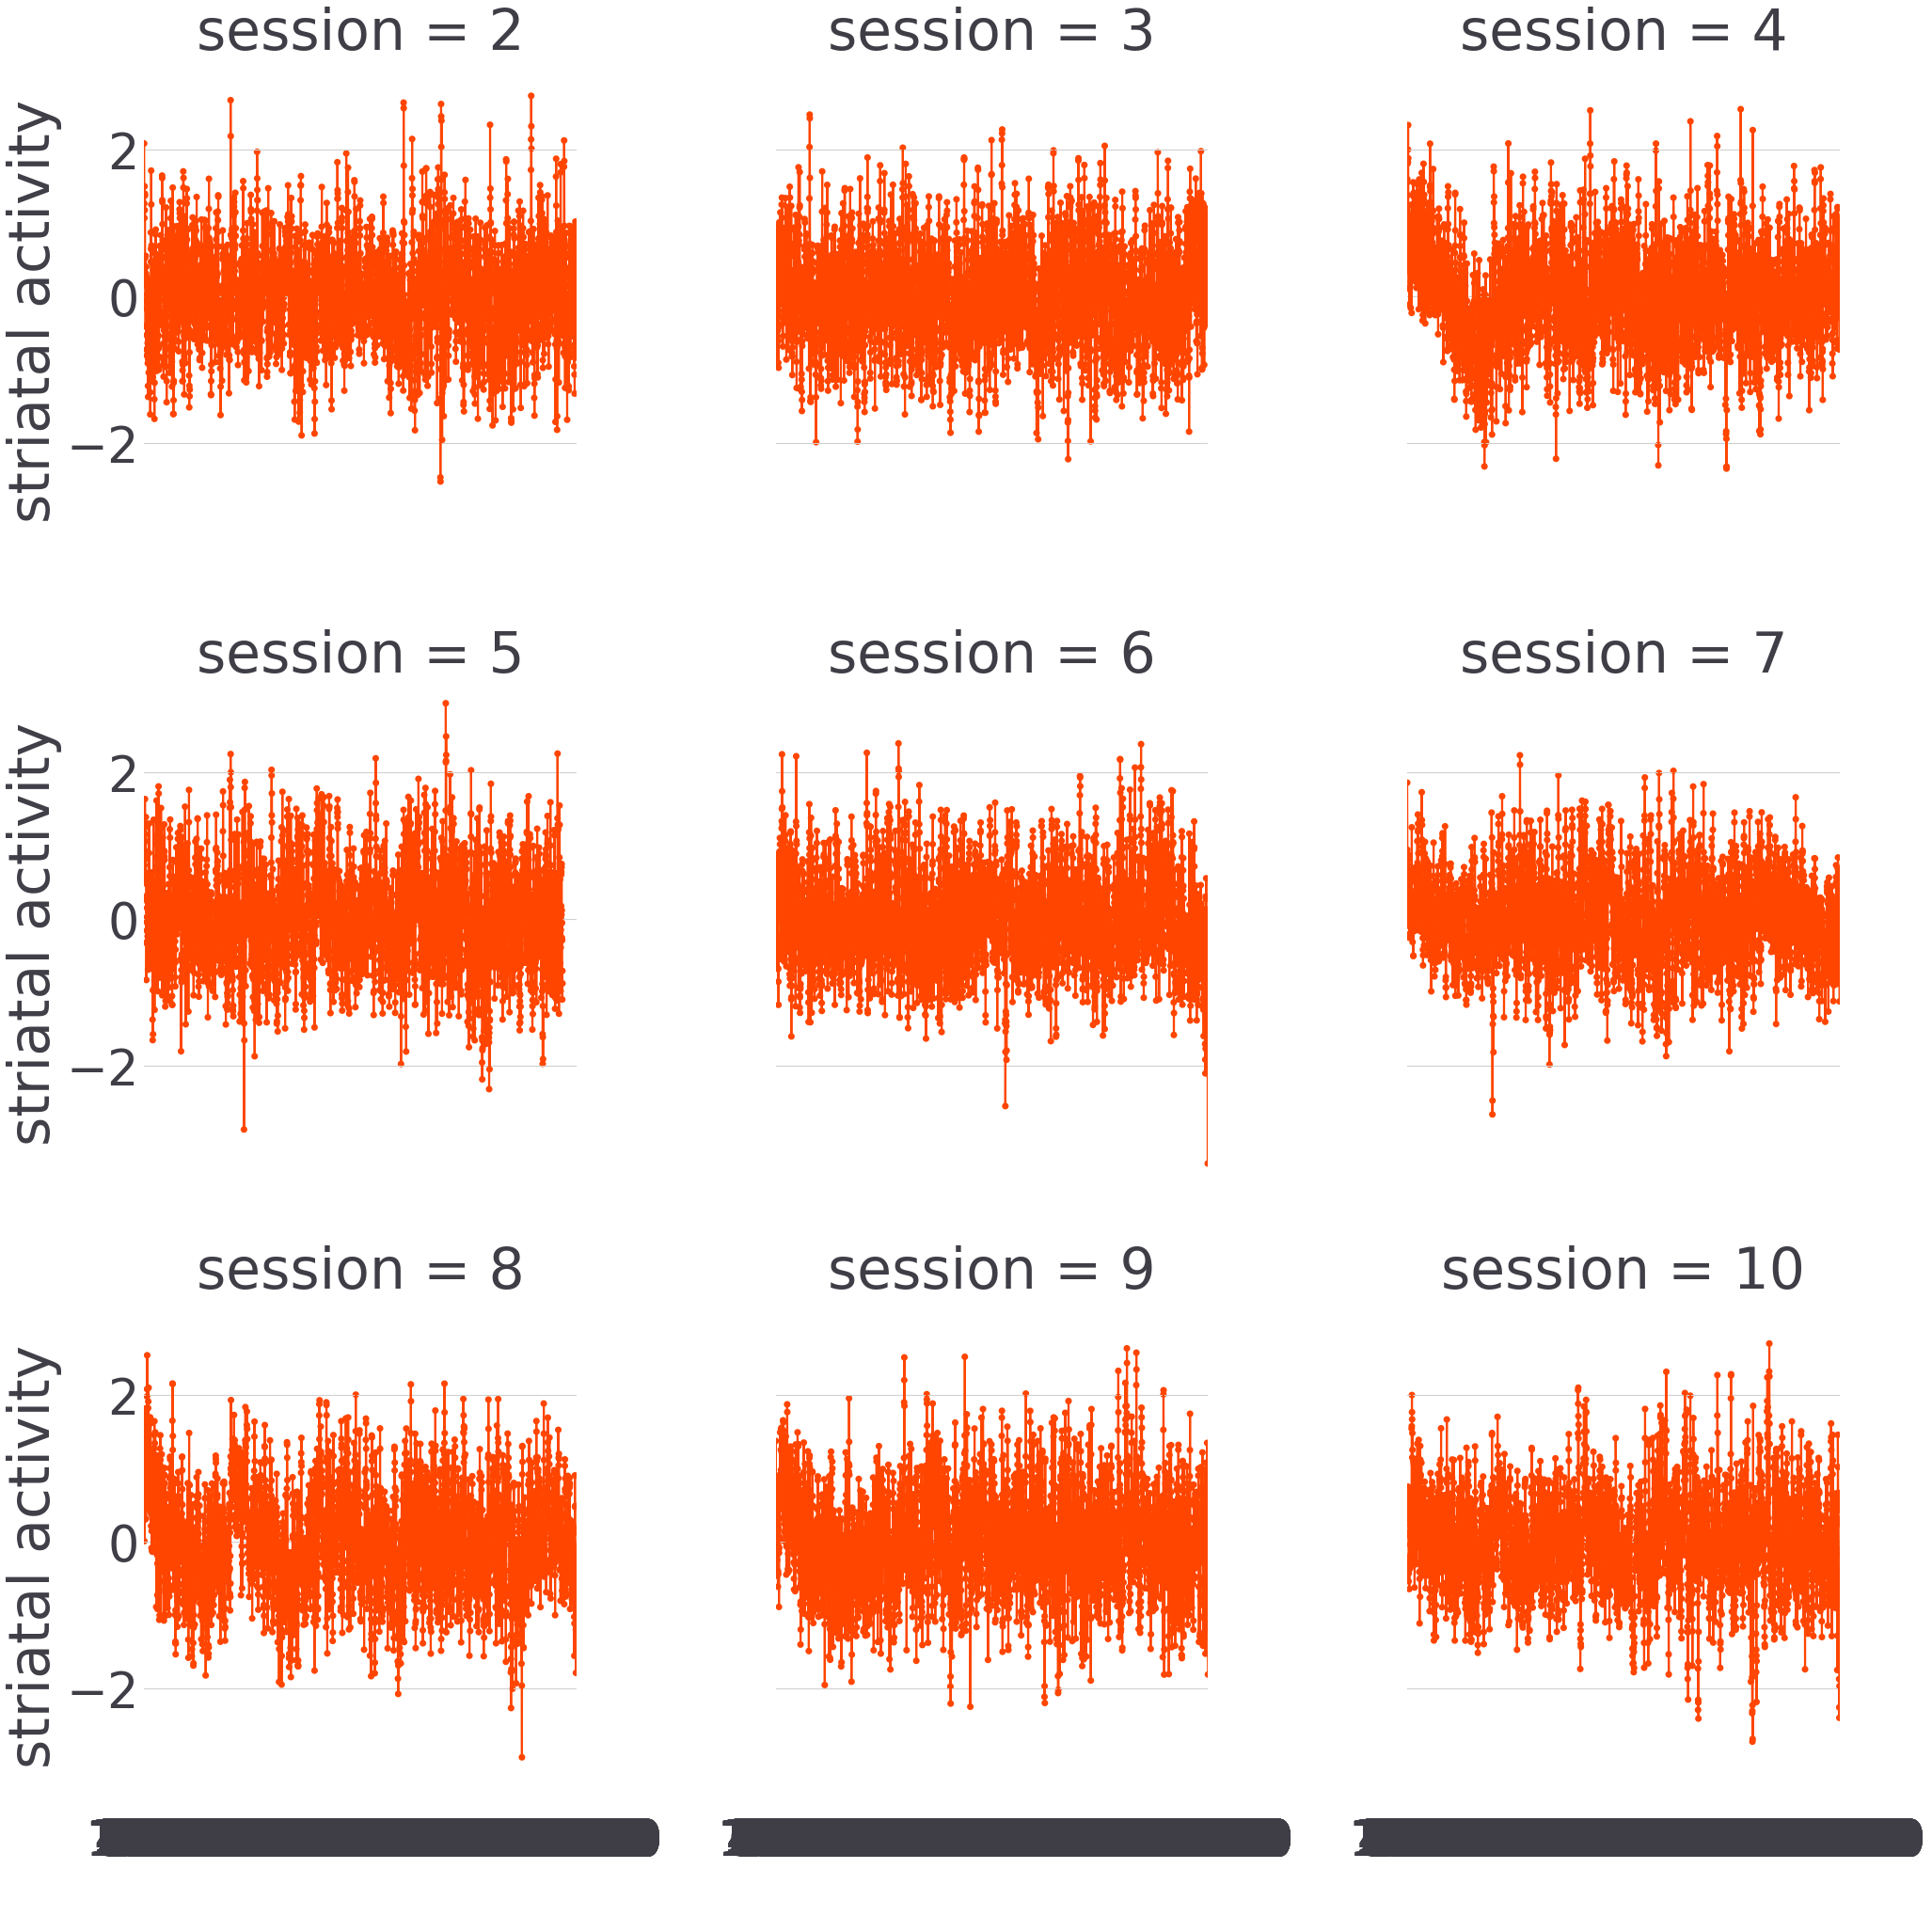

In [115]:
jtplot.style('grade3', fscale=5, spines=False)
sns.set_color_codes("muted")

g = sns.FacetGrid(striatum_df, col='session', col_wrap=3, height=10)
g = g.map(sns.pointplot, "session_sample", "pooled_striatum", color='orangered')

g.set_axis_labels(" ", "striatal activity")

plt.savefig(os.path.join(fig_path, 'striatal_ts_sessions.pdf'))

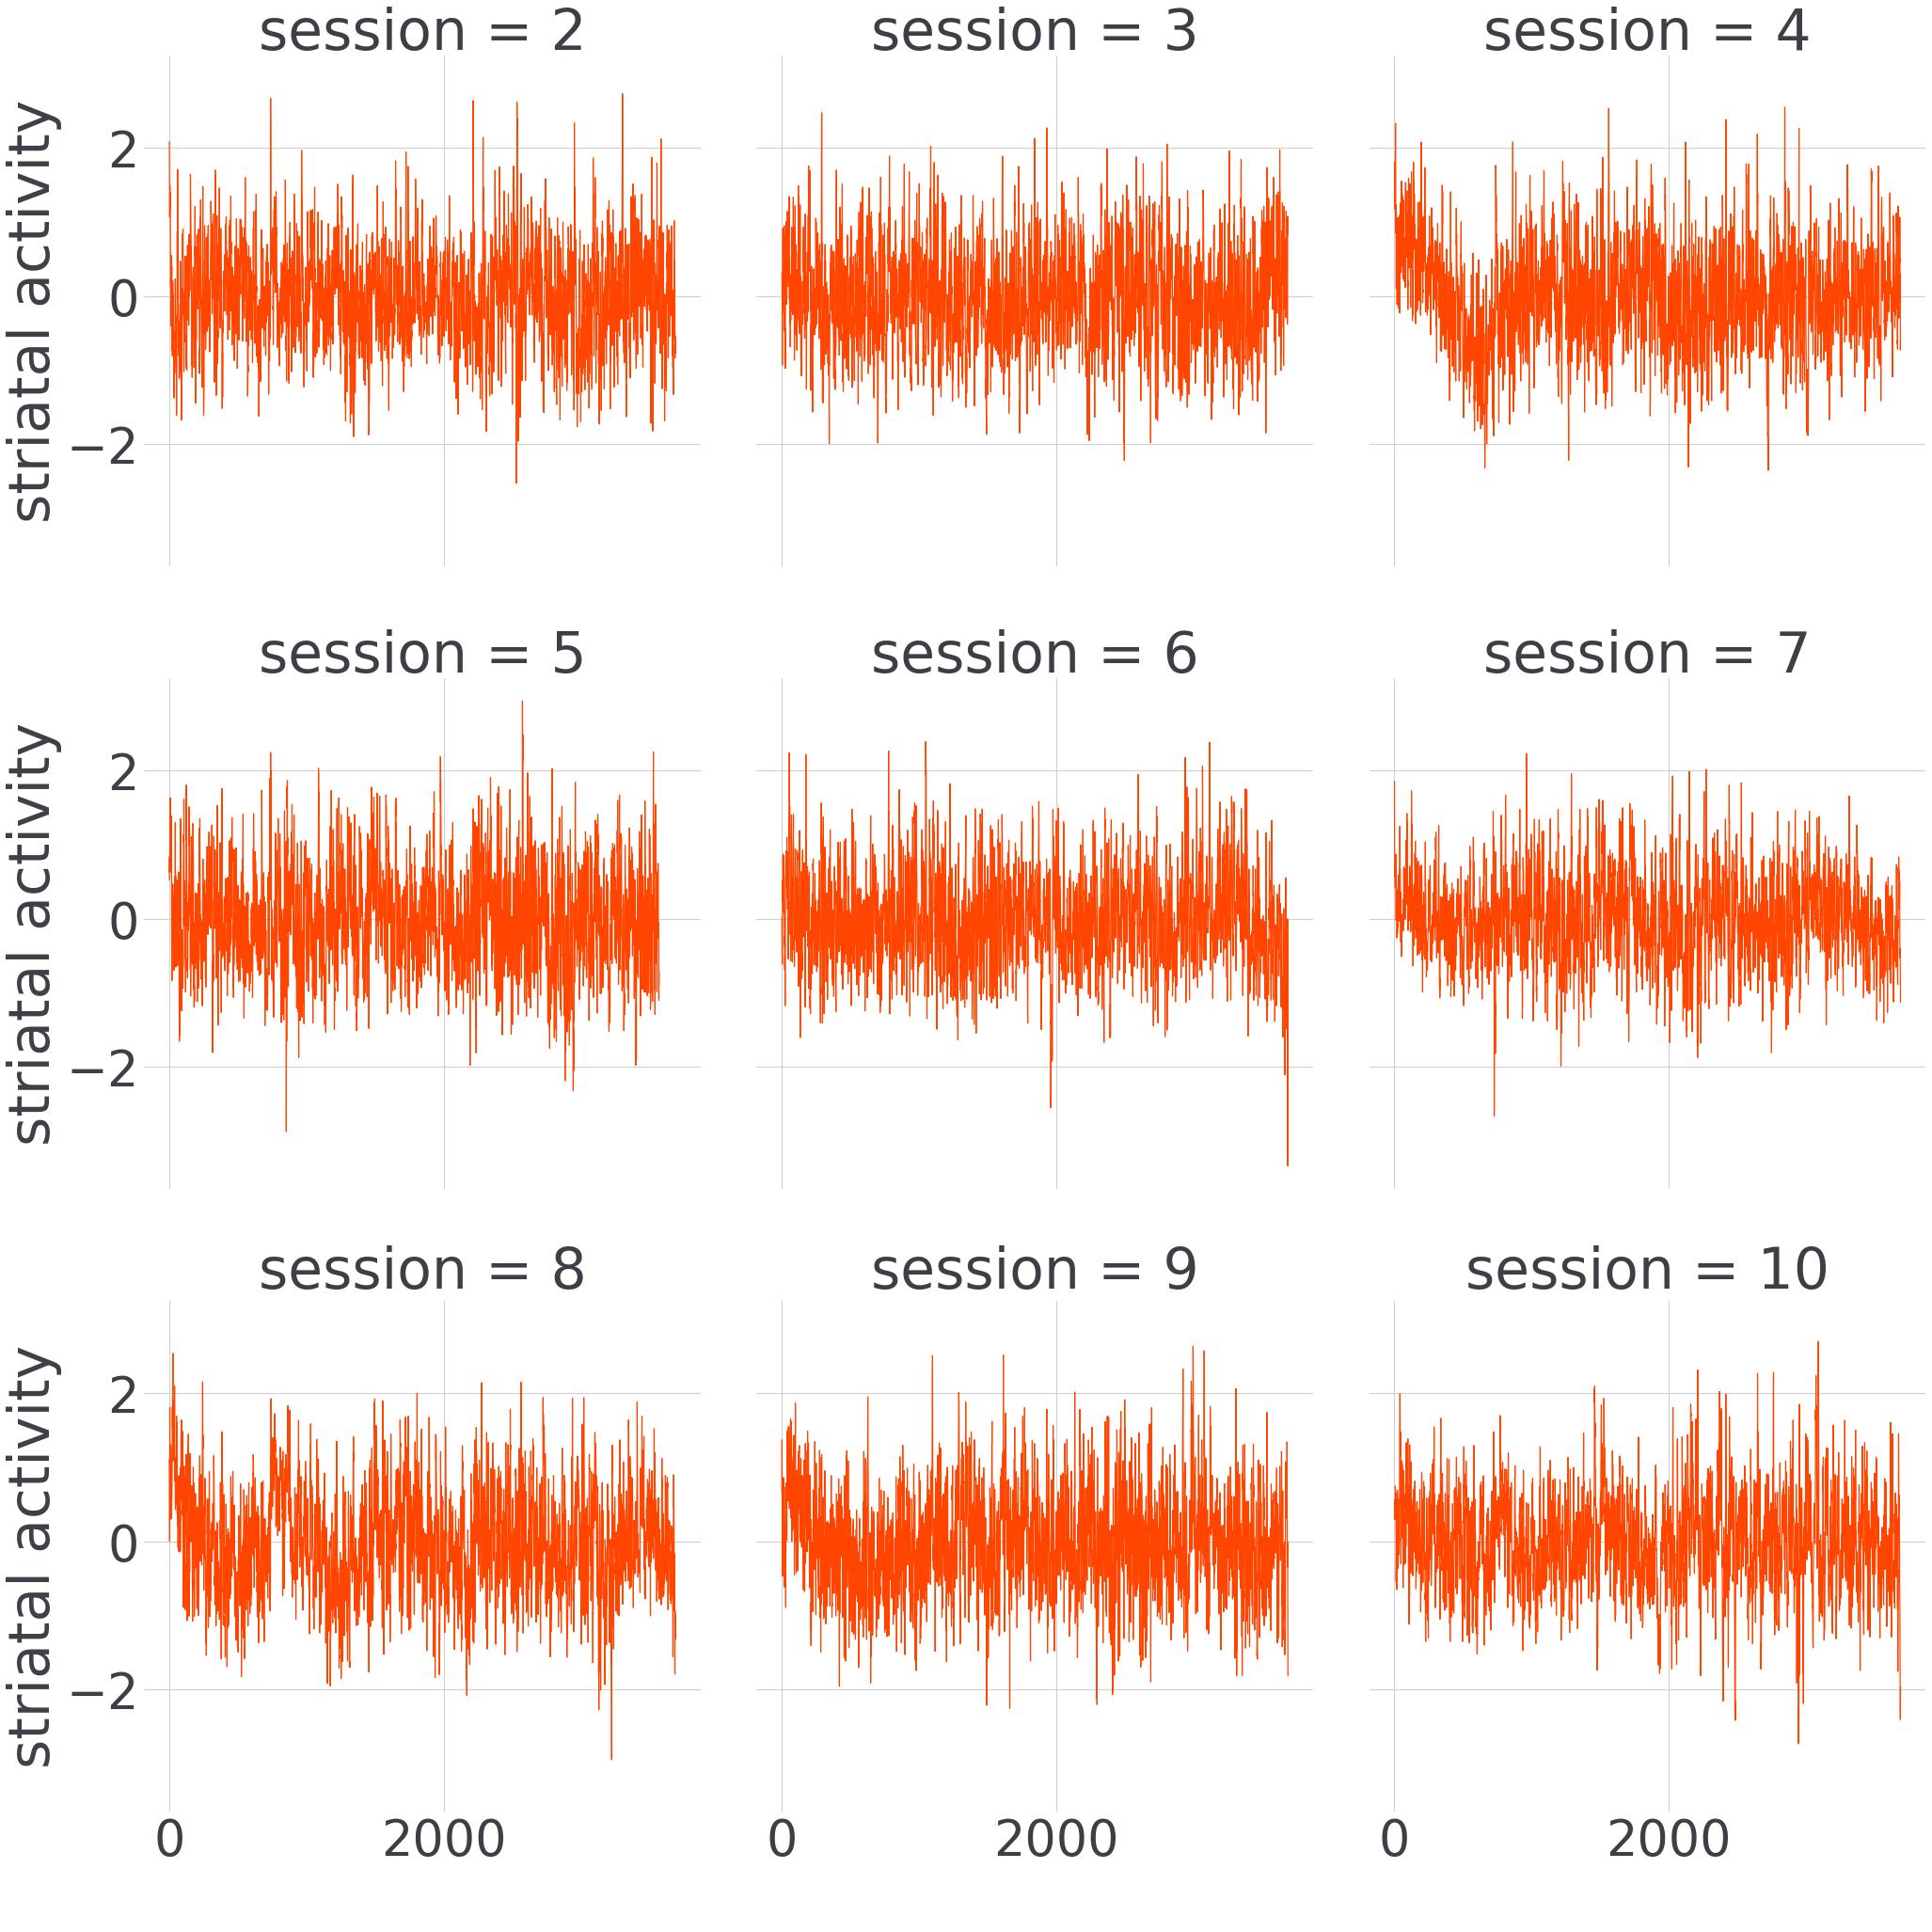

In [117]:
jtplot.style('grade3', fscale=5, spines=False)
sns.set_color_codes("muted")

g = sns.FacetGrid(striatum_df, col='session', col_wrap=3, height=10)
g = g.map(sns.lineplot, "session_sample", "pooled_striatum", color='orangered')

g.set_axis_labels(" ", "striatal activity")

plt.savefig(os.path.join(fig_path, 'striatal_ts_sessions_line.pdf'))